## Training model

In [1]:
#  python script
scClass_path = !cd ../..;pwd
scClass_path = str(scClass_path.n)
import sys; sys.path.append(scClass_path)
import scClass
from scClass.main import Model

In [2]:
def dataset(file):
    return"../../../dataset/"+file

bm_dataset_path = dataset('BoneMarrow.h5ad') 
cb_dataset_path = dataset('CordBlood.h5ad')

In [3]:
adata_bm = scClass.read_h5ad(bm_dataset_path)
adata_cb = scClass.read_h5ad(cb_dataset_path)
adata_bm.obs_names_make_unique()
adata_cb.obs_names_make_unique()
adata_bm.var_names_make_unique()
adata_cb.var_names_make_unique()
adata = scClass.sc.AnnData.concatenate(adata_bm,adata_cb)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/shhsu/.local/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD113-1', 'SNORD113-2']
  warnings.warn(


In [4]:
adata = scClass.normalize_simple(adata)

In [5]:
matrix,label = adata.X,adata.obs['modelA id']

In [6]:
# kick the number celltype_group >50_000, subsmapling to 50_000
import numpy as np
from copy import copy
label = copy(label.values)
for i in range(np.max(label)+1):
    label_num = (label==i).sum()
    if label_num>50_000:
        label_save = np.random.choice(label_num, size=50_000, replace=False)
        label_kick = np.arange(label_num)
        label_kick = np.delete(label_kick,label_save)
        label[np.where(label==i)[0][label_kick]]= -2   
np.unique(label,return_counts=True)  

(array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([189633,  61803,  50000,  50000,  10831,  50000,   2687,   8200,
          3398,  35212,  19044,   3417,  50000,   8894,   4603]))

In [7]:
del adata_bm,adata_cb,adata

## AUTO RUN

step 1: loading data...
step 2: processing data... (kick unknown and random)
kick type_id=-1 cell from 547722 cells to 296286 cells
step 3: put data in dataset...
loading data, it will take time
step 4: initial training model...
step 5: load_model=True, loading model...
step 6: predict the model by testing set...


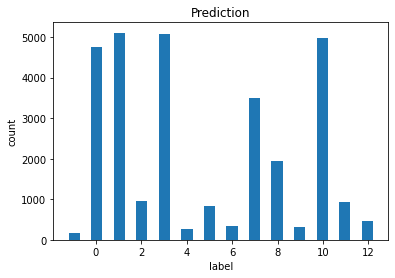

step 7: result for testing set by confusion_matrix...


In [9]:
scClass.auto_run(load_model=True,save=False,matrix=matrix,label=label)

## STEP

In [11]:
matrix,label = scClass.random(matrix=matrix,label=label,seed=0)

kick type_id=-1 cell from 547722 cells to 296286 cells


In [12]:
dataset = scClass.npz_dataloader(matrix,label)

loading data, it will take time


In [13]:
model = scClass.Model()

In [14]:
scClass.training(dataset,model)

0 10 20 30 40 
epoch 0 	| loss:0.27048752 | training accuracy:0.92600000| loss:0.28731433 | validation accuracy:0.91509864
0 10 20 30 40 
epoch 1 	| loss:0.17618392 | training accuracy:0.95500000| loss:0.21604273 | validation accuracy:0.93536629
0 10 20 30 40 
epoch 2 	| loss:0.15308991 | training accuracy:0.95600000| loss:0.18967338 | validation accuracy:0.94051336
0 10 20 30 40 
epoch 3 	| loss:0.13403994 | training accuracy:0.96300000| loss:0.17405961 | validation accuracy:0.94373660
0 10 20 30 40 
epoch 4 	| loss:0.10850801 | training accuracy:0.97400000| loss:0.16445662 | validation accuracy:0.94618357
0 10 20 30 40 
epoch 5 	| loss:0.09891557 | training accuracy:0.97100000| loss:0.15854710 | validation accuracy:0.94749987
0 10 20 30 40 
epoch 6 	| loss:0.08573656 | training accuracy:0.98000000| loss:0.15482141 | validation accuracy:0.94805677
0 10 20 30 40 
epoch 7 	| loss:0.07511037 | training accuracy:0.98300000| loss:0.15248911 | validation accuracy:0.94792176
0 10 20 30 40 
e

0% 33% 67% 

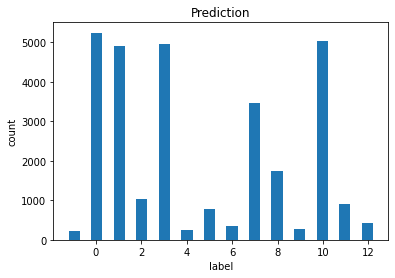

In [15]:
y_pred = scClass.predict_batch(dataset.test_x,model,batch_size=10_000)

,label
-1,unknown
0,T-helper cell
1,cytotoxic T cell
2,memory B cell
3,naive B cell
4,plasma cell
5,precursor B cell
6,pro-B cell
7,natural killer cell
8,erythrocyte

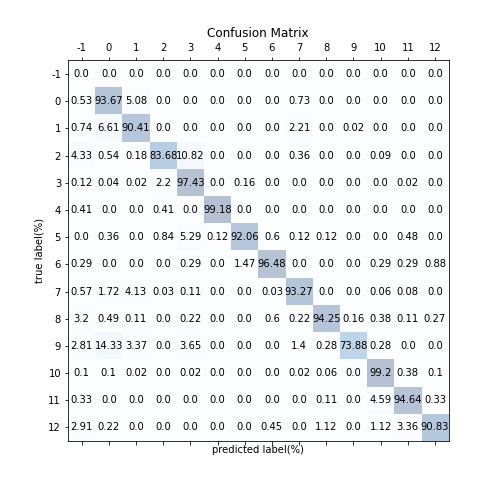

In [16]:
fig = scClass.confusion_matrix(y_pred=y_pred,y_true=dataset.test_y)
scClass.figure_html(fig)

In [19]:
scClass.plot_performance(y_pred=y_pred,y_true=np.array(dataset.test_y))

/home/shhsu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Performance,Value
0,accuary,0.940799
1,precision,0.922293
2,recall,0.956376
3,f1-score,0.937696


In [20]:
model.save()

model stored in: './output/model_20220314_200200.pkl'
